In [3]:
import cv2
import numpy as np

img = cv2.imread('images/1.jpg')
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

cv2.imwrite('images/temp.jpg', res)

True

In [1]:
import cv2
import numpy as np

img = cv2.imread('images/1.jpg',0)
rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])
M = cv2.getRotationMatrix2D((cols/2,rows/2),120,1)
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/s.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[503,491],[2160,833],[657,3601],[2800,3197]])
pts2 = np.float32([[0,0],[cols,0],[0,rows],[cols,rows]])

M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread('images/m2.jpg')
img2 = cv2.imread('images/m1.jpg')
rows1,cols1,ch1 = img1.shape
rows2,cols2,ch2 = img2.shape

pts1 = np.float32([[582,562],[3482-200,548],[611,2400],[3500-200,2400]])
pts2 = np.float32([[0,0],[2886,0],[0,1821],[2886,1821]])

M1 = cv2.getPerspectiveTransform(pts1,pts2)
dst1= cv2.warpPerspective(img1,M1,(2922+200,1810))

M = np.float32([[1,0,490],[0,1,554]])
dst = cv2.warpAffine(dst1,M,(cols2,rows2))

res = cv2.add(img2,dst)

cv2.imshow('img',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

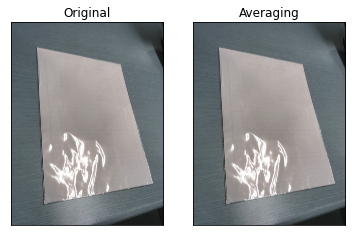

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/s.jpg')
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])

plt.show()

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

l=1
kernel = np.array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  14, -11,  18, -14, -10,  10,  18,  -6, -15,  16,   0],
       [  0,   4,   1, -22,  18,   7,  12, -21,  12,  11,  10,   0],
       [  0,  -7,   9, -12,  12, -22,   7,   7,   6, -17,  -5,   0],
       [  0,  13,  -8,  15, -23,  17, -16,  -8,  -5,  15,  14,   0],
       [  0, -20,  18, -10,  14,   6,  14, -12,   8, -17,   4,   0],
       [  0,   3,  -1,  -5, -19,   9, -22,  10,  -4,  20, -22,   0],
       [  0,  14, -15,  12,   6,  -2,  16, -19,  26, -17,  -2,   0],
       [  0,   3,  -4,  -4,   5,   5, -15,   2, -22,   7,  -5,   0],
       [  0, -11,  18, -14,  16,  -5,  24, -26,  26,   2,  -8,   0],
       [  0, -10, -16,  -2,  -8,  12, -12,  13,  -3, -21,  12,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],np.float32)

img = cv2.imread('images/lena.png', 0)
h,w=img.shape
dst = np.zeros((h-2*l, w-2*l),np.uint8)

for i in range(l,h-l):
    for j in range(l,w-l):
        t=0
        for p in range(-l,l+1):
            for q in range(-l,l+1):
                t += kernel[p+l,q+l]*img[i+p,j+q]
        dst[i-l,j-l]=t 

cv2.imshow('img',img)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

img = cv2.imread('images/fingerprint.jpg',0)
kernel = np.ones((5,5),np.uint8)

erosion = cv2.erode(img,kernel,iterations = 1)
dilation = cv2.dilate(img,kernel,iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

print(kernel)
cv2.imshow('img',opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


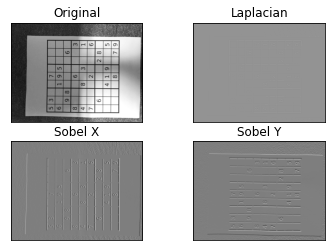

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/1.jpg',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

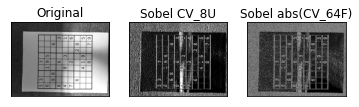

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/1.jpg',0)
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

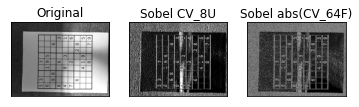

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/1.jpg',0) # Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

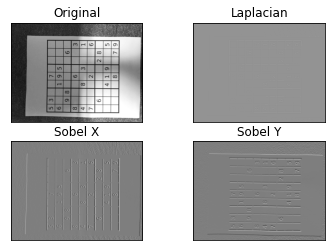

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/1.jpg',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

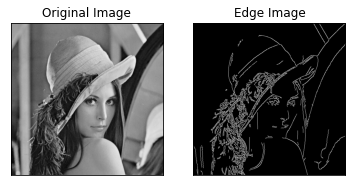

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/lena.png',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

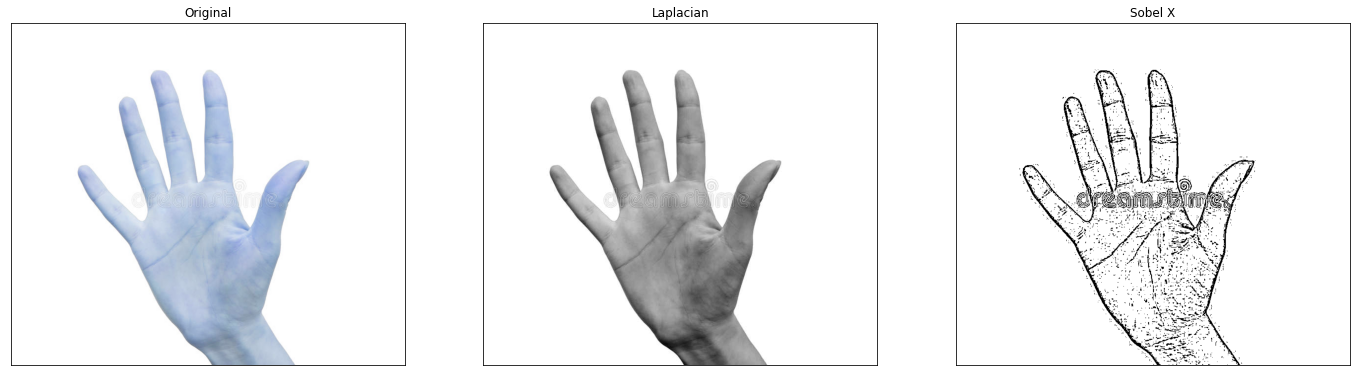

{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}


In [42]:
import numpy as np
import cv2

im = cv2.imread('images/hand.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
#ret, thresh = cv2.threshold(imgray,100,255,0)
thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
 
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 2, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 3, (255,0,0), 3)

cnt = contours[2]
M = cv2.moments(cnt)
print(M)

#epsilon = 0.1*cv2.arcLength(cnt,True)
#approx = cv2.approxPolyDP(cnt,epsilon,True)

#cx = int(M['m10']/M['m00'])
#cy = int(M['m01']/M['m00'])
#img0 = cv2.rectangle(img0, (cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)

